In [7]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import mplfinance as mpf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score

import yfinance as yf

In [8]:
with open('synthetic_data.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [9]:
X, y = dataset

In [10]:
X.shape, y.shape

((4930, 11, 4), (4930,))

In [11]:
X_flatten = X.reshape(X.shape[0], -1, )
X_flatten.shape

(4930, 44)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((3944, 44), (986, 44), (3944,), (986,))

In [13]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [14]:
clf = RandomForestClassifier(random_state=42)

In [15]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
pred = clf.predict(X_test)

In [17]:
accuracy_score(y_test, pred)

0.7941176470588235

In [18]:
np.unique(y, return_counts=True)

(array(['Advance Block', 'Engulfing Bearish', 'Engulfing Bullish',
        'Evening Star', 'Hammer', 'Hanging Man', 'Morning Star'],
       dtype='<U17'),
 array([  42, 2110, 1874,    9,  212,  667,   16]))

In [19]:
stock_data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [20]:
window_size = 11
X_real = []  # Features

# Loop to create 11-day windows and corresponding target labels
for i in range(len(stock_data) - window_size):
    # Slice the data for the current window (only 'Open', 'High', 'Low', 'Close')
    window_data = stock_data.iloc[i:i+window_size]
    
    # Extract features (excluding 'Volume')
    features = window_data[['Open', 'High', 'Low', 'Close']].values.flatten()
    X_real.append(features)

In [21]:
X_real = np.array(X_real)
# X_real = scaler.fit_transform(X_real)

In [22]:
def print_pattern(temp):
    data = {
            'Open':temp[0],
            'High':temp[1], 
            'Low': temp[2], 
            'Close': temp[3]
        }
    
    # Create a DataFrame
    df = pd.DataFrame(data)
    
    # Create a dummy date range to use as an index
    df.index = pd.date_range(start="2023-01-01", periods=len(df), freq="D")
    
    # Plot the candlestick chart
    mpf.plot(df, type='candle', style='yahoo')

In [23]:
probs = clf.predict_proba(X_real)
preds = clf.predict(X_real)
captured = X_real[np.max(probs, axis=1) > 0.8]
captured_labels = preds[np.max(probs, axis=1) > 0.8]
temp = zip(captured, captured_labels)

Engulfing Bullish


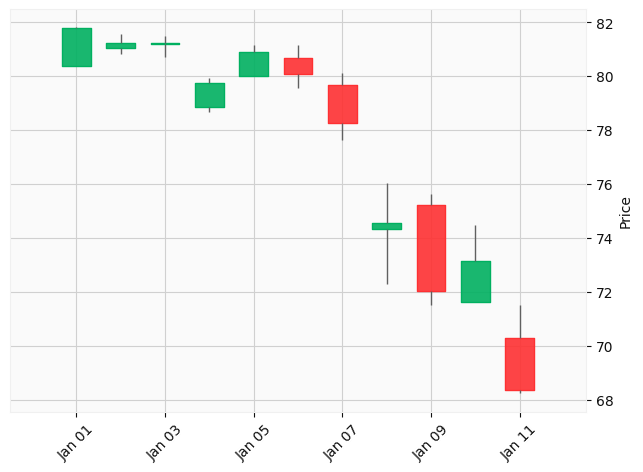

Engulfing Bullish


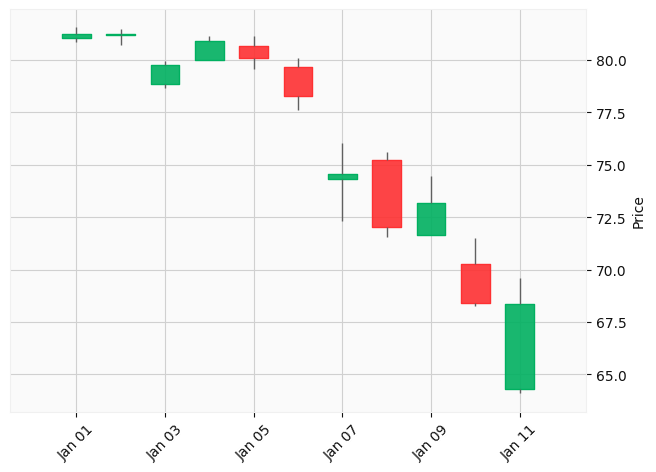

Engulfing Bullish


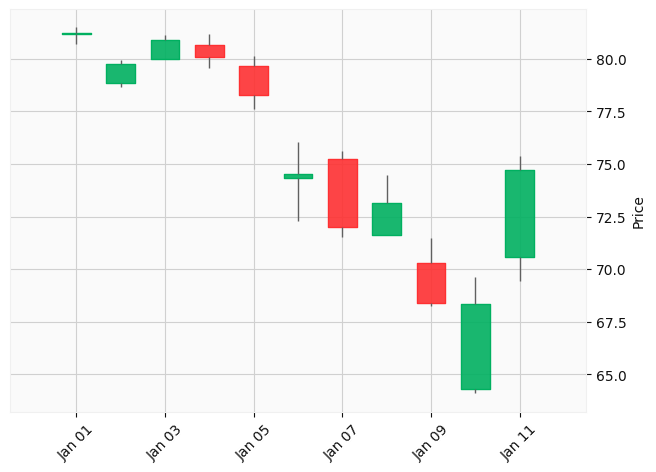

Engulfing Bullish


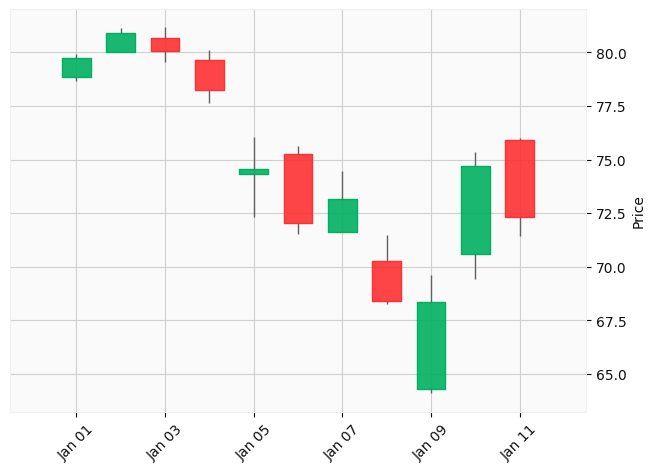

Engulfing Bullish


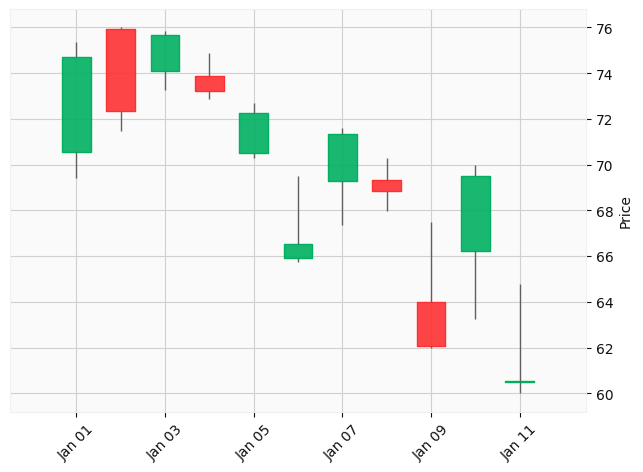

Engulfing Bullish


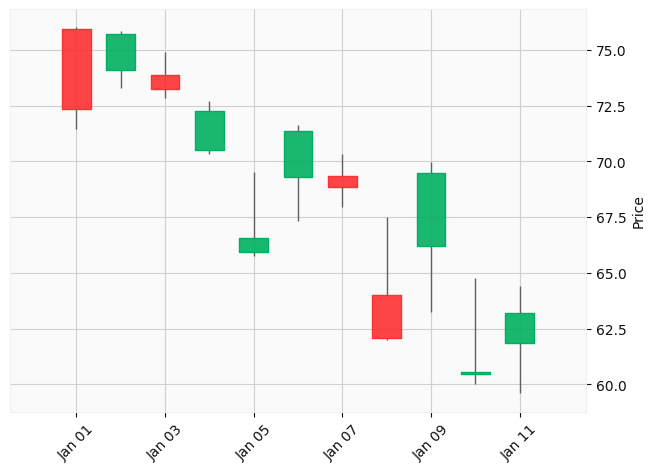

Engulfing Bullish


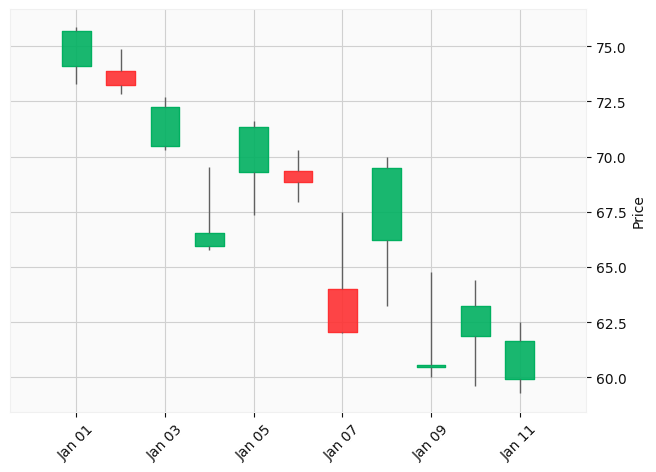

Engulfing Bullish


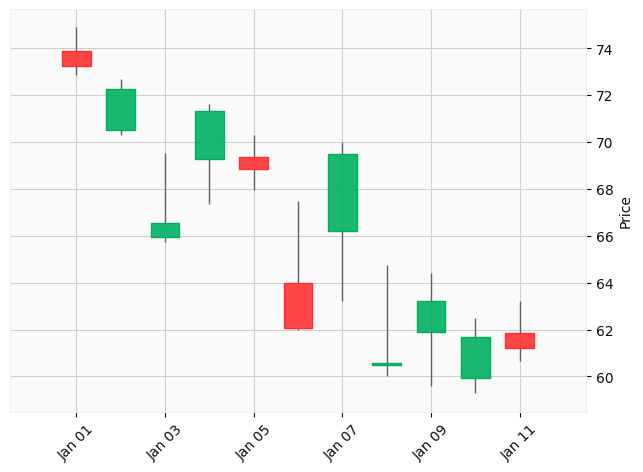

Engulfing Bullish


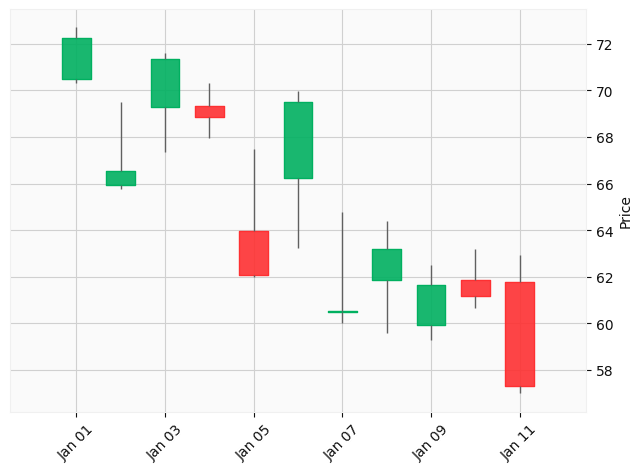

Engulfing Bullish


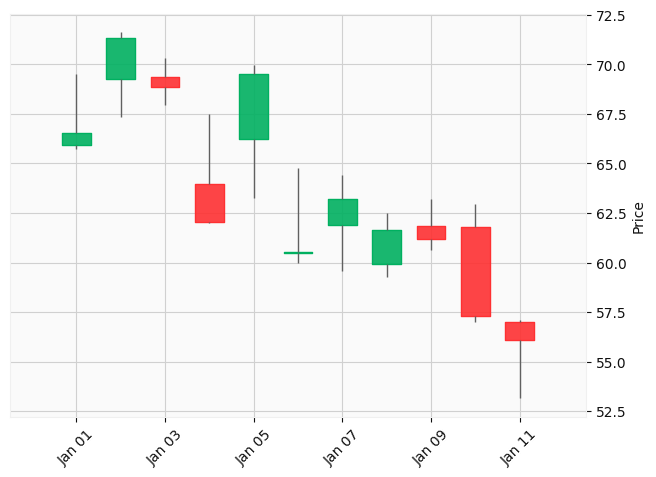

Engulfing Bullish


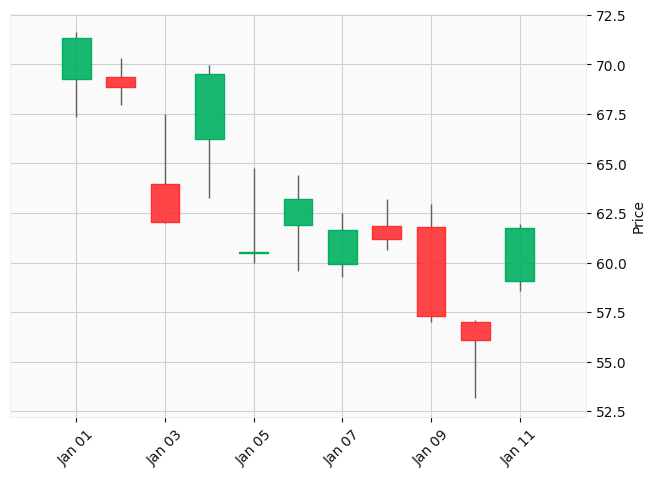

Engulfing Bullish


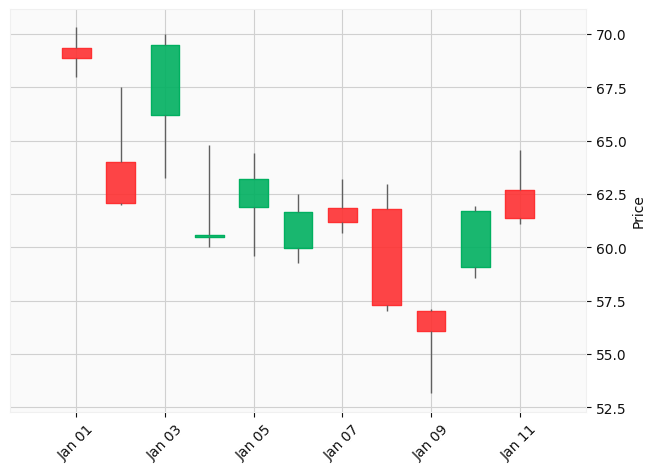

Engulfing Bearish


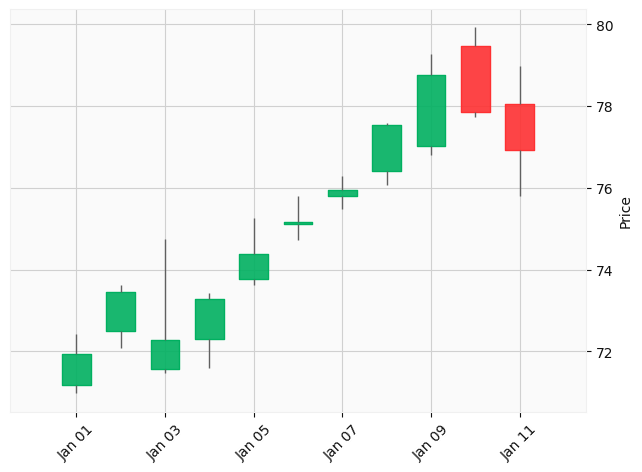

Engulfing Bearish


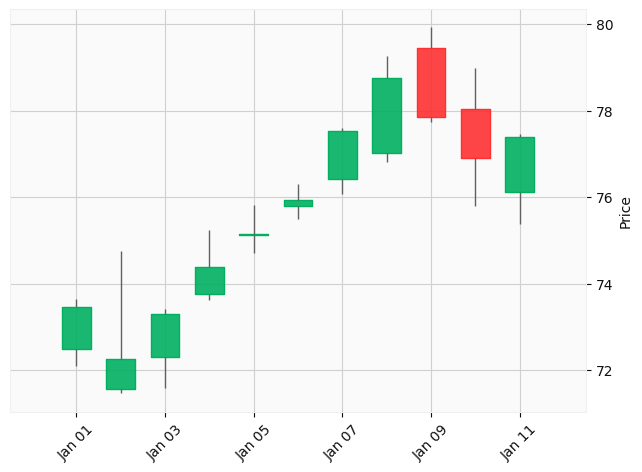

Engulfing Bullish


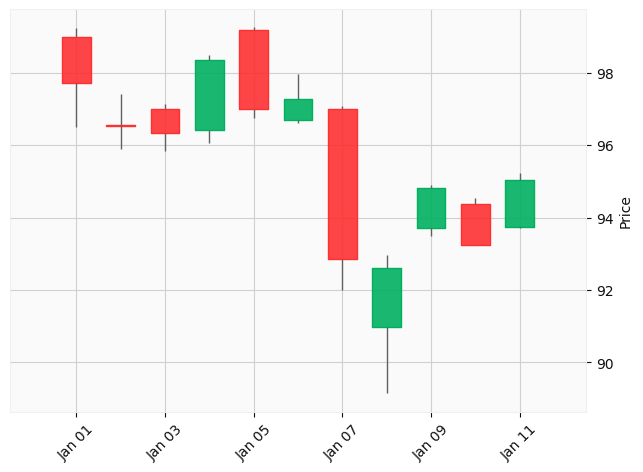

Engulfing Bullish


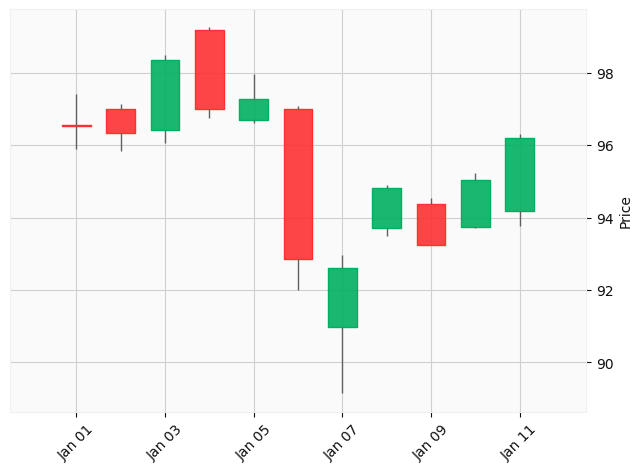

Engulfing Bearish


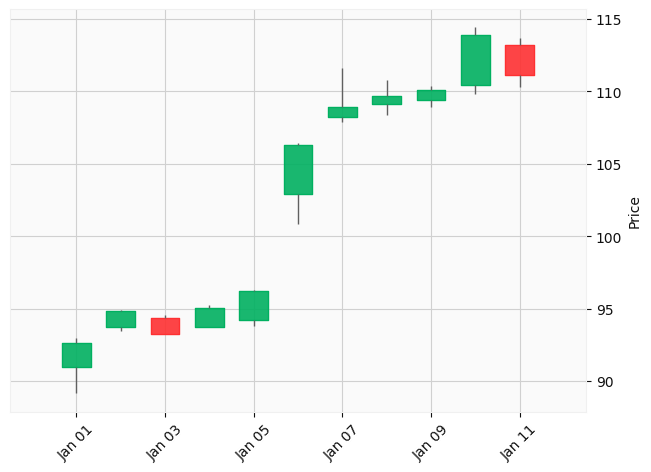

Engulfing Bearish


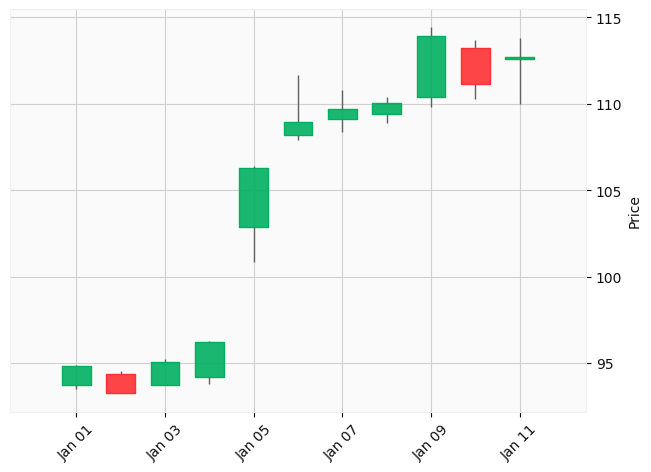

Engulfing Bearish


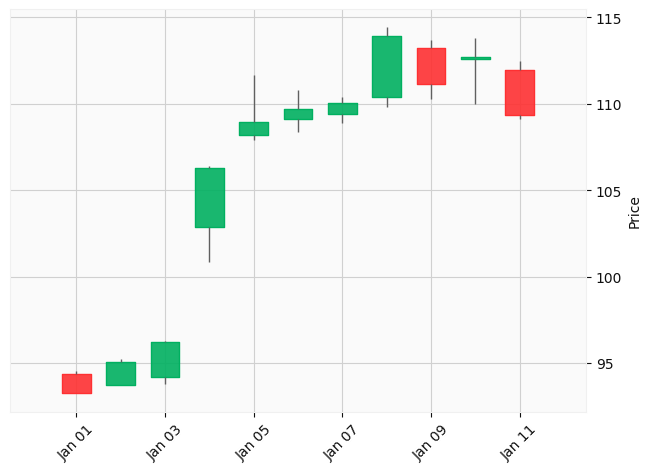

Engulfing Bearish


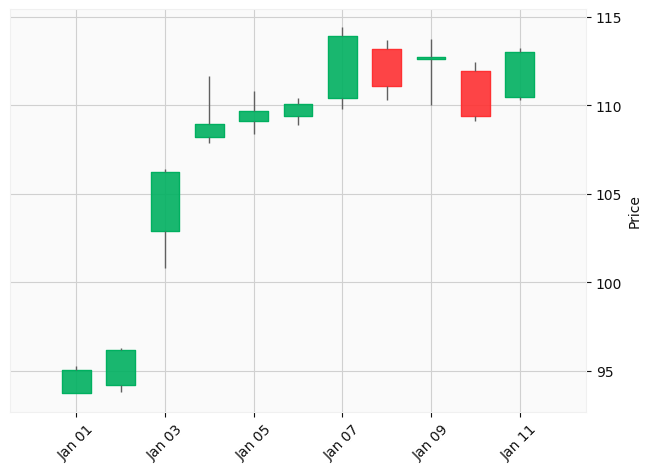

Engulfing Bearish


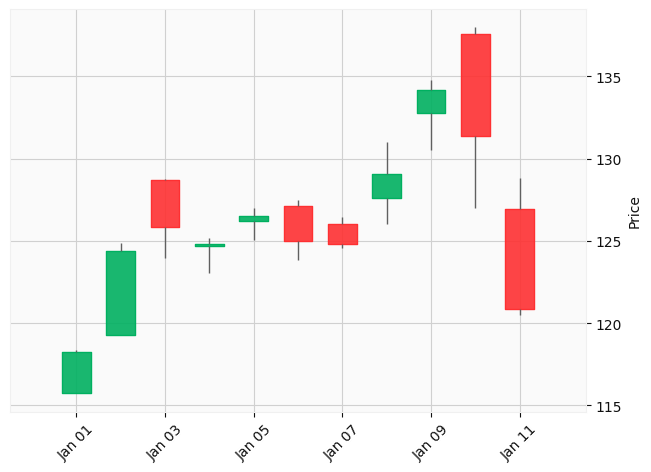

Engulfing Bullish


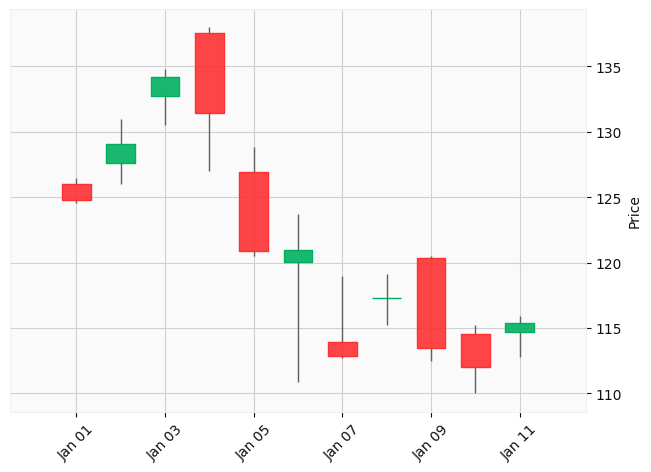

Engulfing Bullish


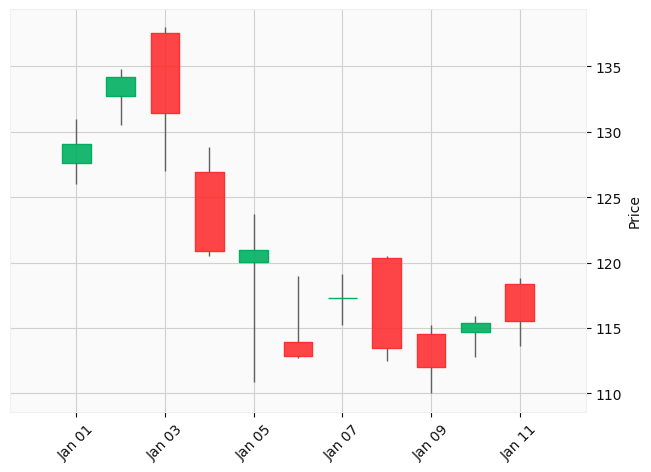

Engulfing Bullish


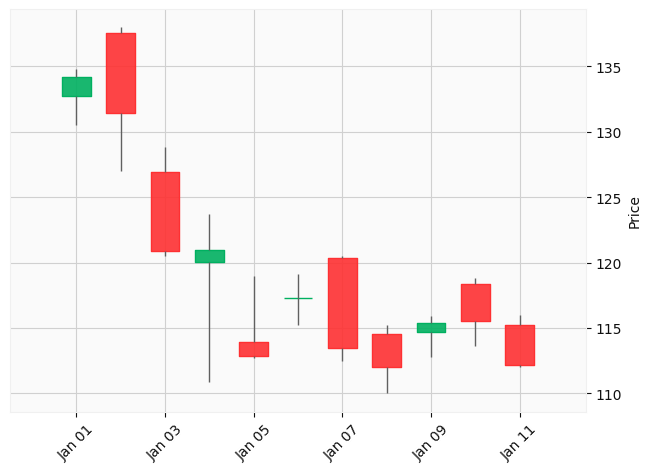

Engulfing Bullish


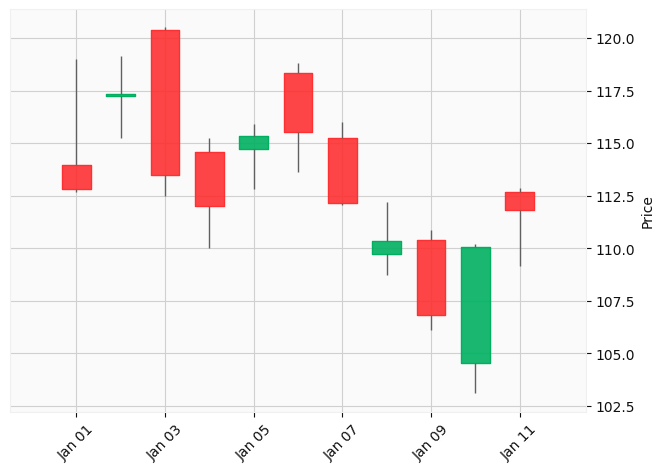

Engulfing Bullish


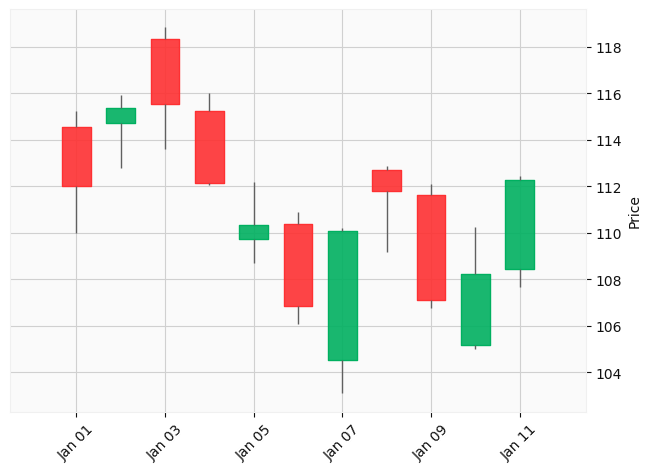

Engulfing Bullish


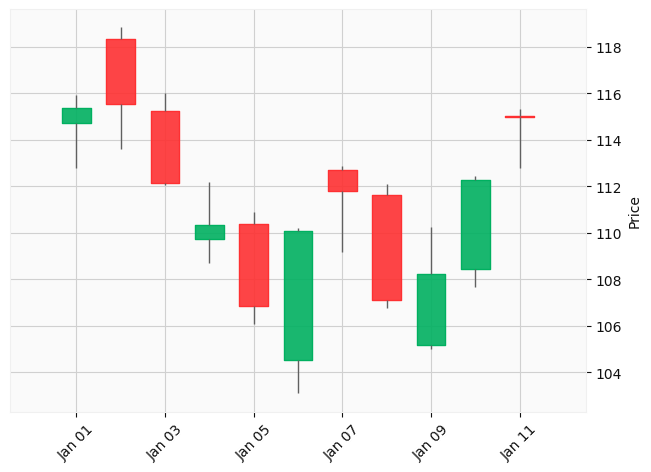

Engulfing Bullish


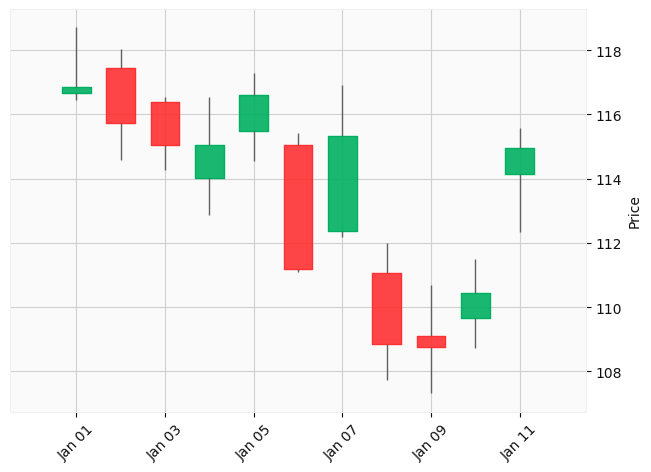

Engulfing Bearish


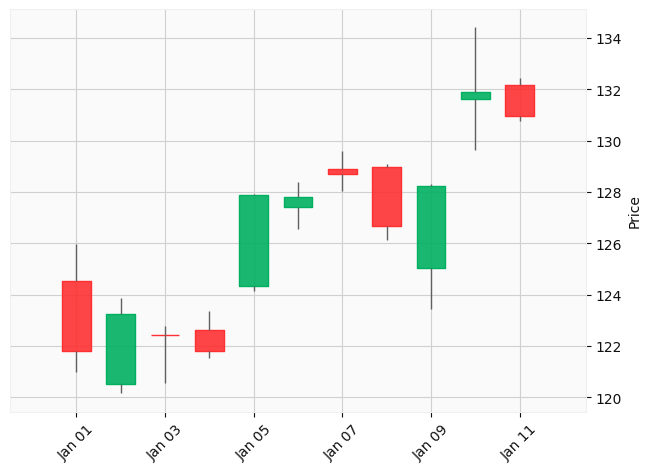

Engulfing Bearish


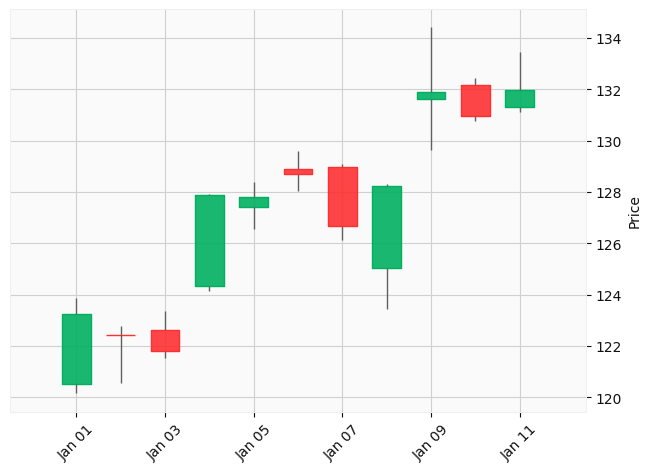

Engulfing Bullish


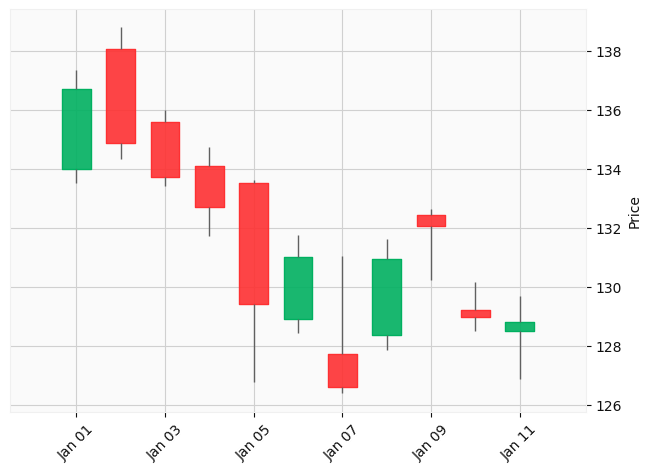

Engulfing Bearish


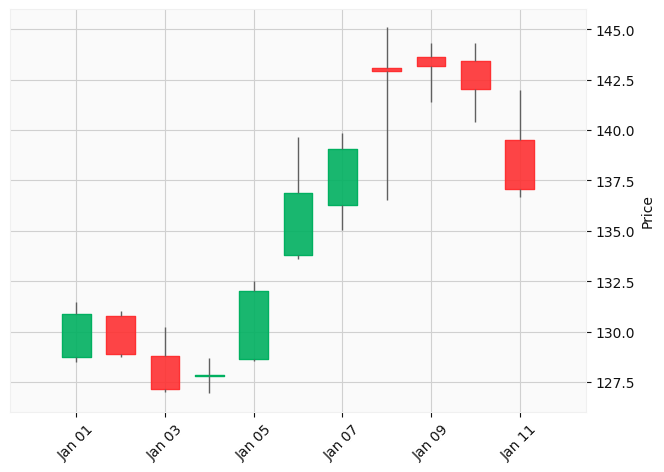

Engulfing Bullish


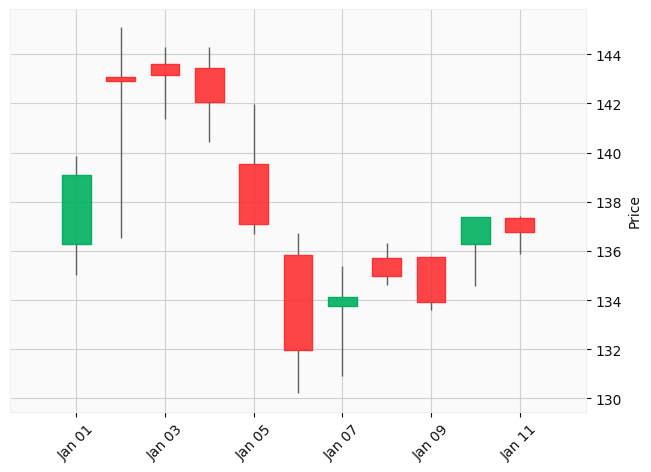

Engulfing Bearish


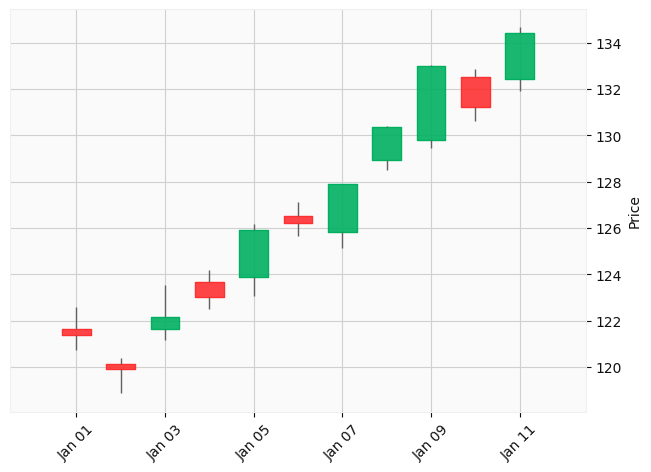

Engulfing Bearish


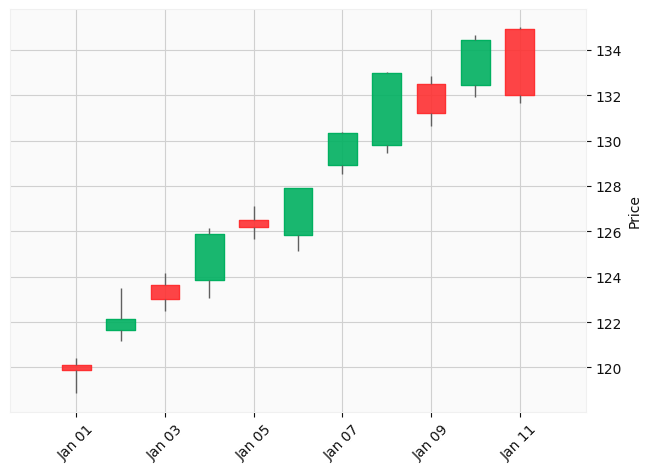

Engulfing Bearish


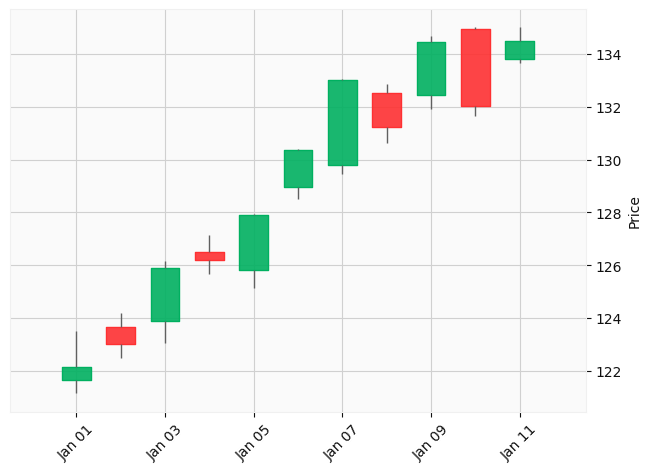

Engulfing Bearish


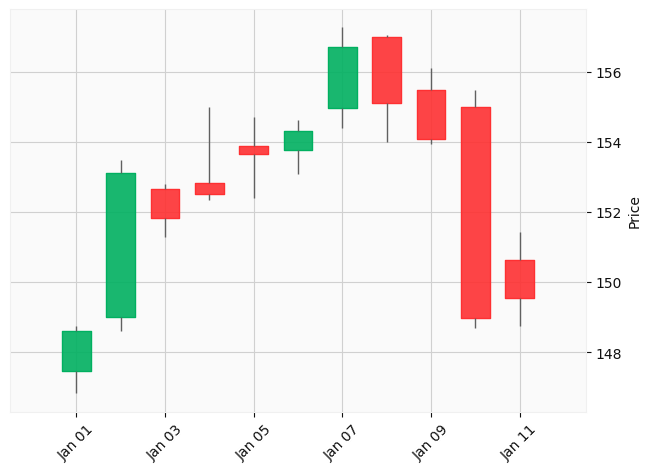

Engulfing Bearish


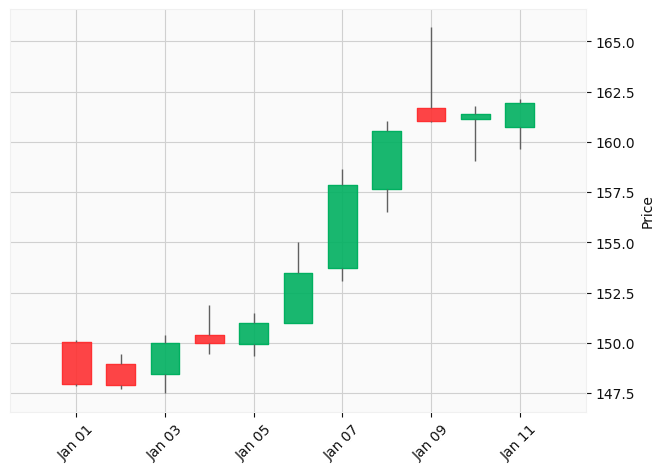

Engulfing Bearish


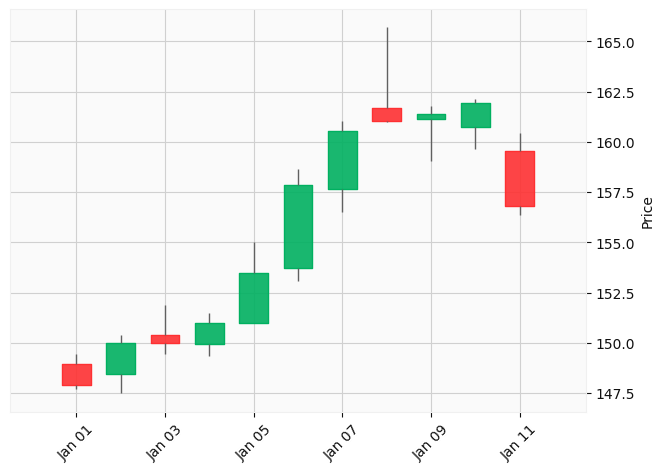

Engulfing Bullish


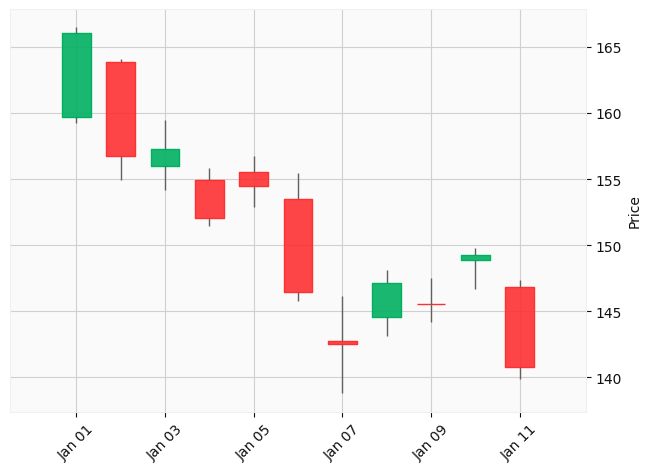

Engulfing Bullish


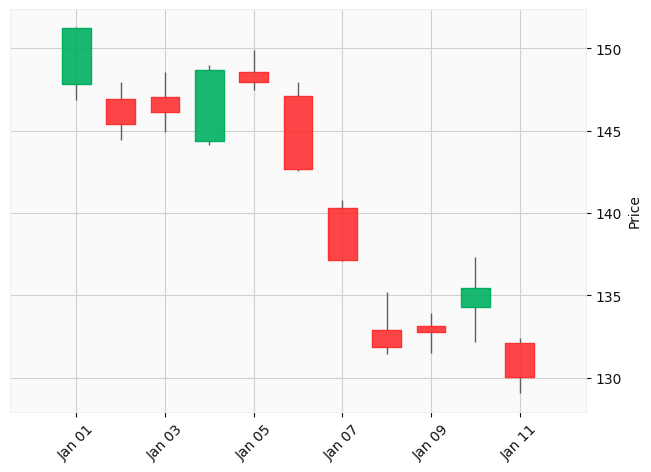

Engulfing Bullish


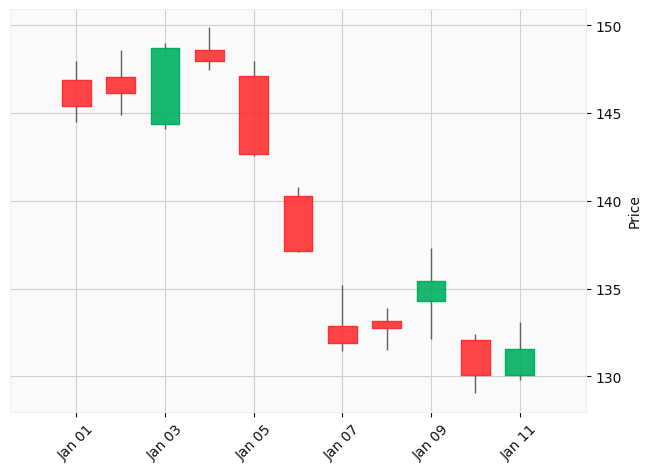

Engulfing Bullish


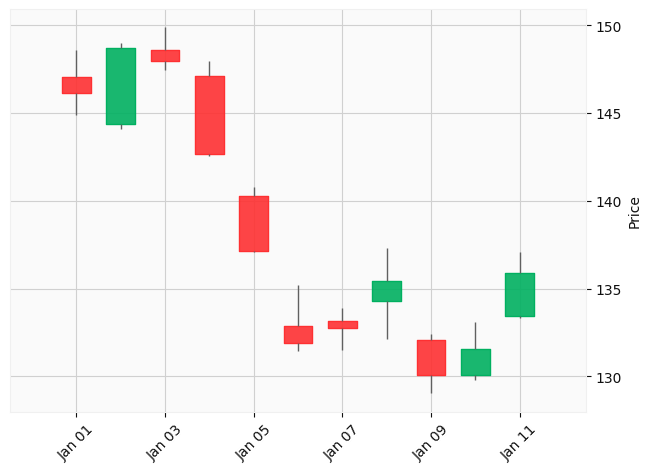

Engulfing Bullish


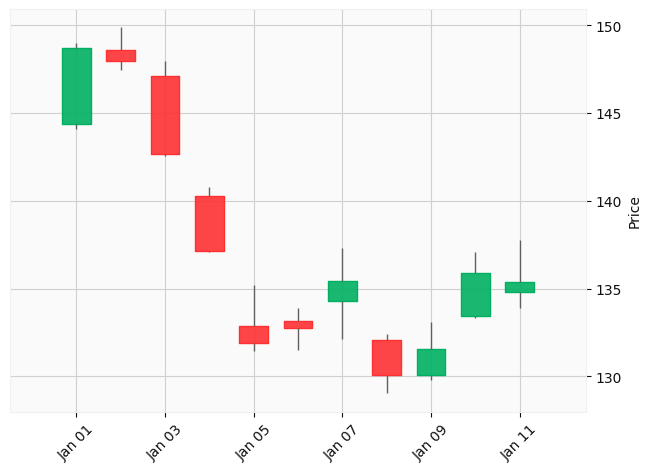

Engulfing Bullish


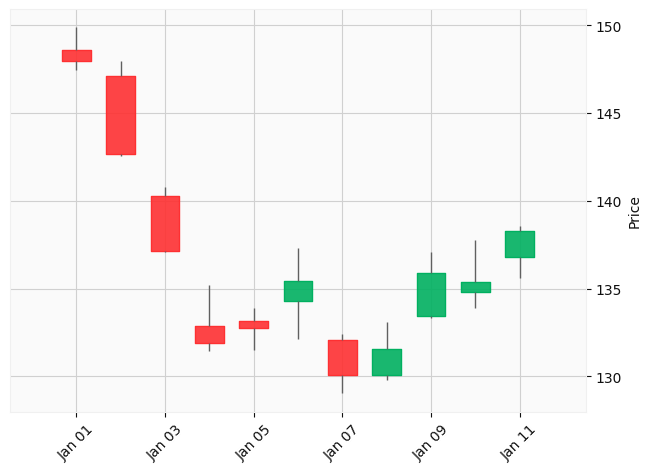

Engulfing Bearish


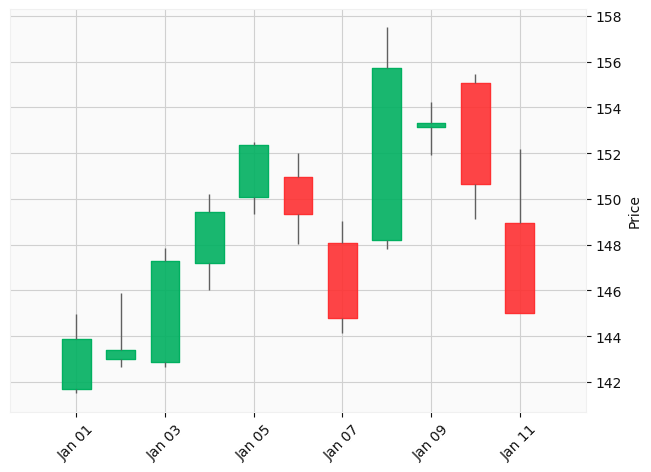

Engulfing Bullish


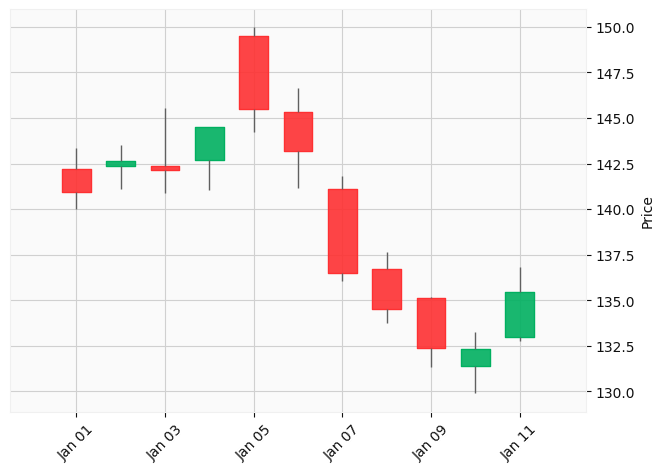

Engulfing Bullish


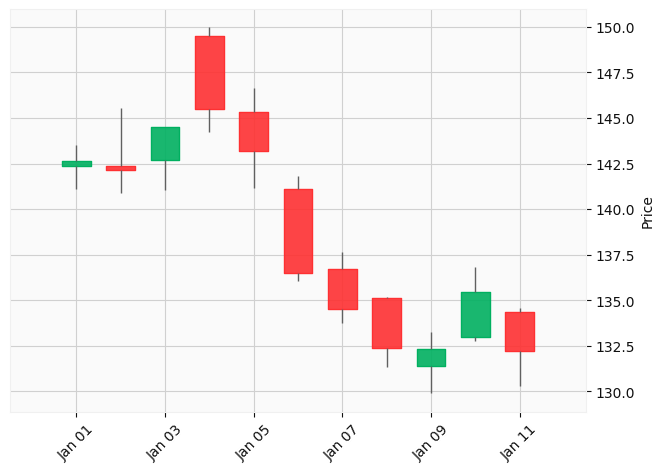

Engulfing Bullish


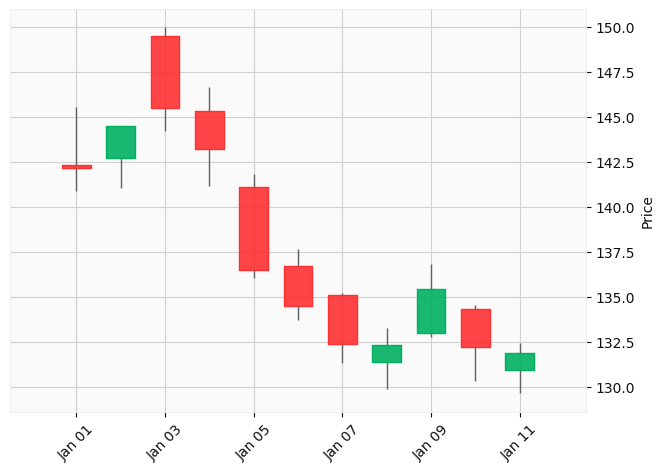

Engulfing Bullish


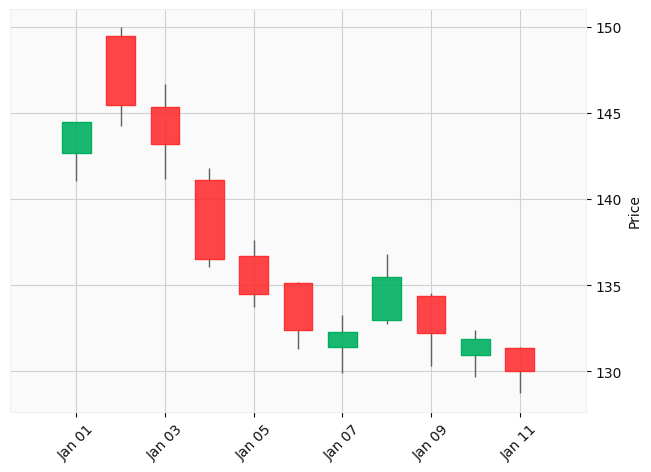

Engulfing Bullish


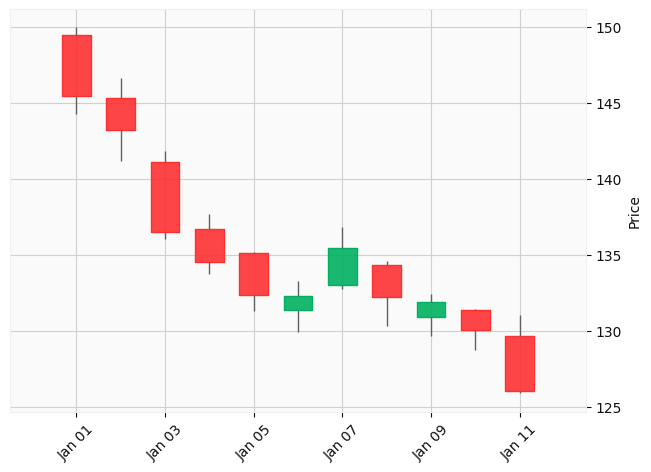

Engulfing Bullish


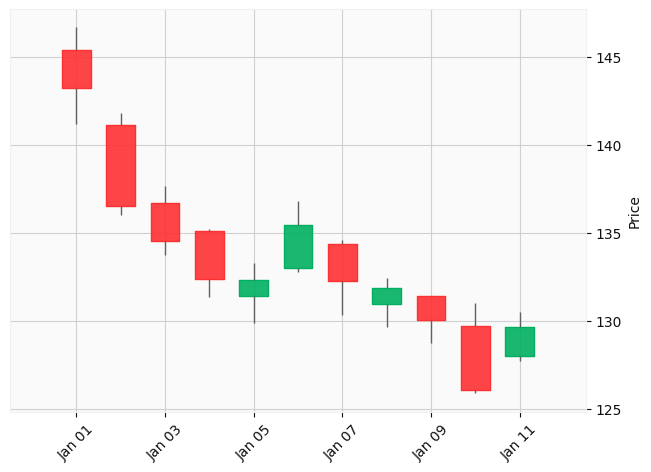

Engulfing Bullish


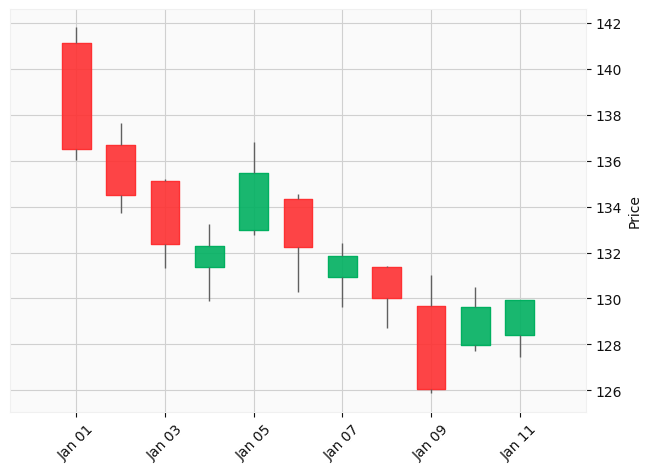

Engulfing Bearish


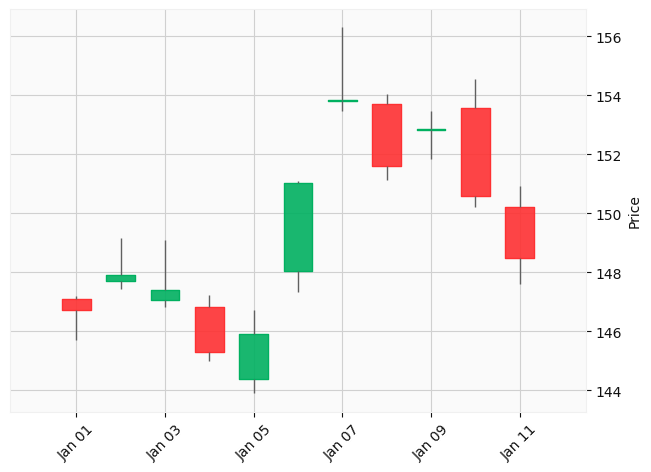

Engulfing Bullish


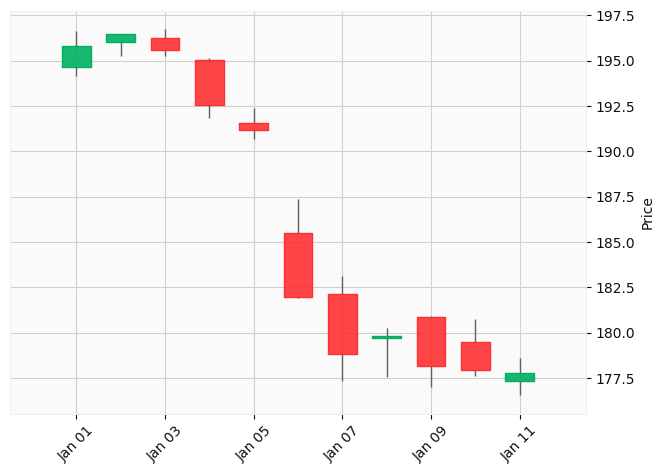

Engulfing Bullish


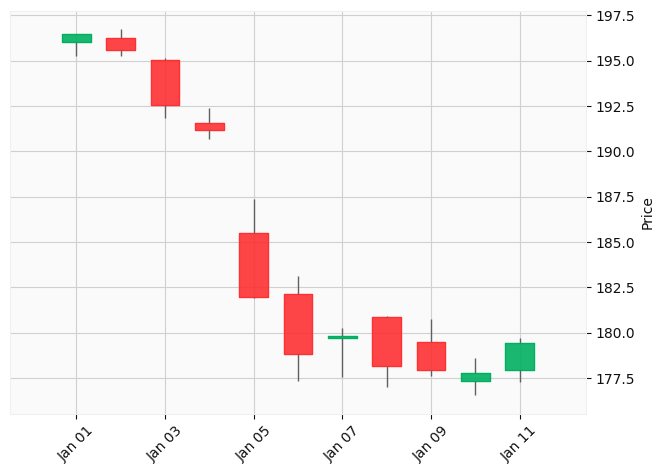

In [24]:
for i, k in temp:
    j = i.reshape(11, 4)
    print(k)
    print_pattern(np.moveaxis(j, 0, 1))